In [34]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# packages for hyperparameters tuning
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm import tqdm

import os
import numpy as np

import joblib

In [35]:
dataset = pd.read_csv("data/credit_risk_data_processed.csv")

In [36]:
def log_transform(df, columns):
    df_log = df.copy()
    for col in columns:
        df_log[col] = np.log1p(df[col])
    return df_log

In [37]:
scaler = StandardScaler()

In [38]:
# Standardize the data
def standardize_data(X):
    data = X.copy()
    num_features = data.select_dtypes(include=['int64', 'float64']).columns
    data = log_transform(data, num_features)
    data[num_features] = scaler.fit_transform(data[num_features])
    return data

In [39]:
X = dataset.drop(columns=['default', 'id'])
X = standardize_data(X)
y = dataset['default']

In [40]:
# Split the dataset into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [41]:
# Get size of the dataset
print("Training set size: ", len(X_train))
print("Validation set size: ", len(X_val))
print("Test set size: ", len(X_test))

Training set size:  23452
Validation set size:  5864
Test set size:  3258


In [42]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Stochastic Gradient Descent': SGDClassifier(random_state=42), 
    'XGBoost': XGBClassifier(random_state=42), 
    "AdaBoost": AdaBoostClassifier(random_state=45),
    "LightGBM": LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42), 
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

In [43]:
results = []
trained_model = {}
for name, model in tqdm(models.items()):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    trained_model[name] = model 
    print("Model: ", name)
    print("Accuracy: ", accuracy_score(y_val, y_val_pred))
    print("F1: ", f1_score(y_val, y_val_pred))
    print("Precision: ", precision_score(y_val, y_val_pred))
    print("Recall: ", recall_score(y_val, y_val_pred))
    print("\n")

  0%|          | 0/12 [00:00<?, ?it/s]

Model:  Logistic Regression
Accuracy:  0.8219645293315143
F1:  0.3433962264150943
Precision:  0.48404255319148937
Recall:  0.26608187134502925


Model:  Decision Tree
Accuracy:  0.8221350613915416
F1:  0.4987986544930322
Precision:  0.4919431279620853
Recall:  0.5058479532163743




 25%|██▌       | 3/12 [00:04<00:15,  1.75s/it]

Model:  Random Forest
Accuracy:  0.8257162346521146
F1:  0.459830866807611
Precision:  0.5023094688221709
Recall:  0.4239766081871345




 33%|███▎      | 4/12 [01:13<03:35, 26.95s/it]

Model:  Support Vector Classifier
Accuracy:  0.8221350613915416
F1:  0.1000862812769629
Precision:  0.43609022556390975
Recall:  0.056530214424951264




 58%|█████▊    | 7/12 [01:14<00:44,  8.97s/it]

Model:  K-Nearest Neighbors
Accuracy:  0.820600272851296
F1:  0.3811764705882353
Precision:  0.4807121661721068
Recall:  0.3157894736842105


Model:  Naive Bayes
Accuracy:  0.8166780354706685
F1:  0.39708356702187325
Precision:  0.4676354029062087
Recall:  0.34502923976608185


Model:  Stochastic Gradient Descent
Accuracy:  0.8226466575716235
F1:  0.32989690721649484
Precision:  0.4866920152091255
Recall:  0.24951267056530213




 67%|██████▋   | 8/12 [01:14<00:26,  6.68s/it]

Model:  XGBoost
Accuracy:  0.831343792633015
F1:  0.4835509138381201
Precision:  0.5208098987626547
Recall:  0.4512670565302144




c:\Users\celin_e3kjw6h\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
 75%|███████▌  | 9/12 [01:15<00:15,  5.18s/it]

Model:  AdaBoost
Accuracy:  0.8291268758526603
F1:  0.5494604316546763
Precision:  0.510016694490818
Recall:  0.5955165692007798




 83%|████████▎ | 10/12 [01:16<00:07,  3.89s/it]

Model:  LightGBM
Accuracy:  0.82537517053206
F1:  0.47216494845360824
Precision:  0.5010940919037199
Recall:  0.44639376218323584




 92%|█████████▏| 11/12 [01:19<00:03,  3.77s/it]

Model:  Gradient Boosting
Accuracy:  0.8272510231923602
F1:  0.48131080389144903
Precision:  0.5070118662351673
Recall:  0.4580896686159844




100%|██████████| 12/12 [01:33<00:00,  7.83s/it]

Model:  CatBoost
Accuracy:  0.8308321964529332
F1:  0.4773445732349842
Precision:  0.5194954128440367
Recall:  0.4415204678362573




In [44]:
# Define parameter grids for grid search
param_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],
}
param_cat = {
    'iterations': [500, 700, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128],
}
param_lgbm = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_fraction': [0.6, 0.8, 1.0],
}

In [45]:
# GridSearchCV for each model
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_rf,
    cv=2,
    scoring='recall',
    verbose=1,
    n_jobs=-1
)
grid_cat = GridSearchCV(
    CatBoostClassifier(verbose=0, random_state=42),
    param_grid=param_cat,
    cv=2,
    scoring='recall',
    verbose=1,
    n_jobs=-1
)
grid_lgbm = GridSearchCV(
    LGBMClassifier(random_state=42),
    param_grid=param_lgbm,
    cv=2,
    scoring='recall',
    verbose=1,
    n_jobs=-1
)

In [ ]:
# Fitting the models
grid_rf.fit(X_train, y_train)

Fitting 2 folds for each of 243 candidates, totalling 486 fits


In [ ]:
grid_cat.fit(X_train, y_train)

In [ ]:
grid_lgbm.fit(X_train, y_train)

In [ ]:
# models = {
#     'Random Forest': RandomForestClassifier(**grid_rf.best_params_, random_state=42),
#     'CatBoost': CatBoostClassifier(**grid_cat.best_params_, verbose=0, random_state=42),
#     "LightGBM": LGBMClassifier(**grid_lgbm.best_params_, random_state=42),
# }

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\celin_e3kjw6h\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\celin_e3kjw6h\AppData\Local\Temp\ipykernel_23316\235914342.py", line 3, in <module>
    'CatBoost': CatBoostClassifier(**grid_cat.best_params_, verbose=0, random_state=42),
AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\celin_e3kjw6h\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\celin_e3kjw6h\AppData\Roaming\Python\Python39\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\celin_e3kjw6h\AppDat

In [ ]:
# Save all three models
def save_model(model, model_name):
    joblib.dump(model, f"models/{model_name}.joblib")
    print(f"Model {model_name} saved to models/{model_name}.joblib")
# for name, model in models.items():
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Predict on validation set
#     y_test_pred = model.predict(X_test)
#     print("Model: ", name)
#     save_model(model, name)
#     print("\n")

In [ ]:
model = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
y_test_pred = model.predict(X_test)
print("Model: ", "Random Forest")
save_model(model, "Random Forest")
print("\n")

Model:  Random Forest
Model Random Forest saved to models/Random Forest.joblib




In [ ]:
models_list = ["Random Forest", "CatBoost", "LightGBM"]

In [ ]:
# Load the models
def load_model(model_name):
    model = joblib.load(f"models/{model_name}.joblib")
    print(f"Model {model_name} loaded from models/{model_name}.joblib")
    return model
loaded_models = {}
for name in models_list:
    loaded_models[name] = load_model(name)
    # Train the model
    model.fit(X_train, y_train)
    loaded_models[name] = model

Model Random Forest loaded from models/Random Forest.joblib
Model CatBoost loaded from models/CatBoost.joblib
Model LightGBM loaded from models/LightGBM.joblib


In [ ]:
def evaluate_models(X, y):
    for name, model in loaded_models.items():
        y_pred = model.predict(X)
        print("Model: ", name)
        print("Accuracy: ", accuracy_score(y, y_pred))
        print("F1: ", f1_score(y, y_pred))
        print("Precision: ", precision_score(y, y_pred))
        print("Recall: ", recall_score(y, y_pred))
        print("\n")

In [ ]:
evaluate_models(X_val, y_val)

Model:  Random Forest
Accuracy:  0.8286152796725784
F1:  0.47737909516380655
Precision:  0.5117056856187291
Recall:  0.4473684210526316


Model:  CatBoost
Accuracy:  0.8286152796725784
F1:  0.47737909516380655
Precision:  0.5117056856187291
Recall:  0.4473684210526316


Model:  LightGBM
Accuracy:  0.8286152796725784
F1:  0.47737909516380655
Precision:  0.5117056856187291
Recall:  0.4473684210526316




In [ ]:
evaluate_models(X_test, y_test)

Model:  Random Forest
Accuracy:  0.8201350521792511
F1:  0.4633699633699634
Precision:  0.494140625
Recall:  0.4362068965517241


Model:  CatBoost
Accuracy:  0.8201350521792511
F1:  0.4633699633699634
Precision:  0.494140625
Recall:  0.4362068965517241


Model:  LightGBM
Accuracy:  0.8201350521792511
F1:  0.4633699633699634
Precision:  0.494140625
Recall:  0.4362068965517241




In [ ]:
# Get classification report
def get_classification_report(X, y):
    for name, model in loaded_models.items():
        y_pred = model.predict(X)
        print("Model: ", name)
        print("Classification Report: \n", classification_report(y, y_pred))
        print("\n")

In [ ]:
get_classification_report(X_val, y_val)

Model:  Random Forest
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      4838
           1       0.51      0.45      0.48      1026

    accuracy                           0.83      5864
   macro avg       0.70      0.68      0.69      5864
weighted avg       0.82      0.83      0.82      5864



Model:  CatBoost
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      4838
           1       0.51      0.45      0.48      1026

    accuracy                           0.83      5864
   macro avg       0.70      0.68      0.69      5864
weighted avg       0.82      0.83      0.82      5864



Model:  LightGBM
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      4838
           1       0.51      0.45      0.48      1026

    accuracy                           0.83    

In [ ]:
get_classification_report(X_test, y_test)

Model:  Random Forest
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      2678
           1       0.49      0.44      0.46       580

    accuracy                           0.82      3258
   macro avg       0.69      0.67      0.68      3258
weighted avg       0.81      0.82      0.82      3258



Model:  CatBoost
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      2678
           1       0.49      0.44      0.46       580

    accuracy                           0.82      3258
   macro avg       0.69      0.67      0.68      3258
weighted avg       0.81      0.82      0.82      3258



Model:  LightGBM
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      2678
           1       0.49      0.44      0.46       580

    accuracy                           0.82    

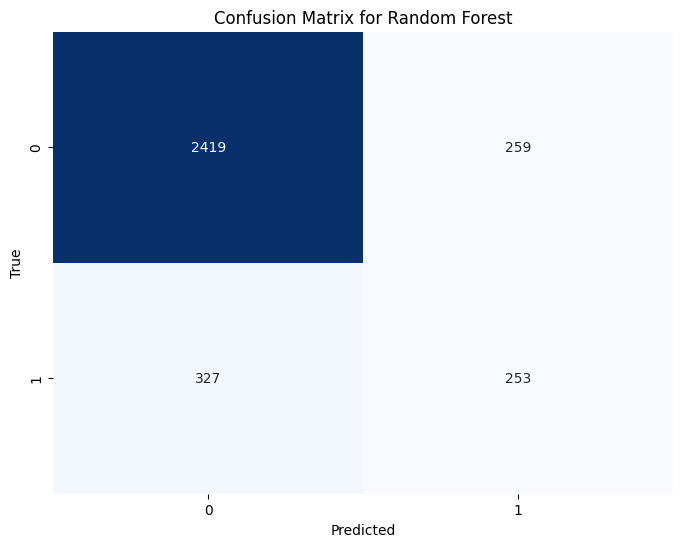

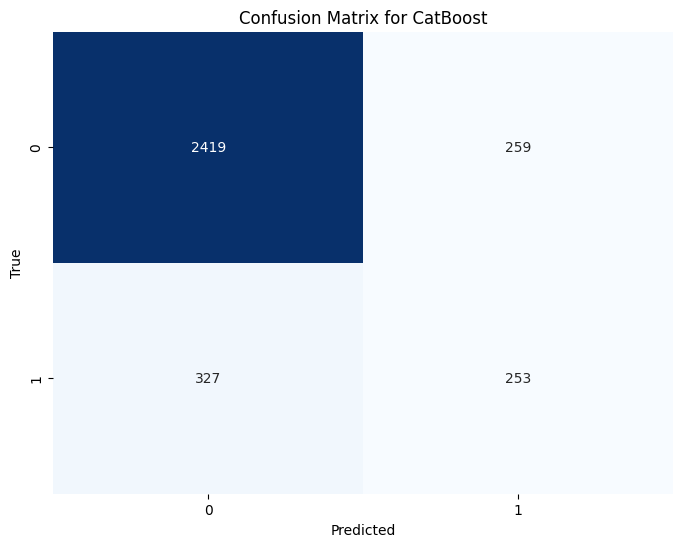

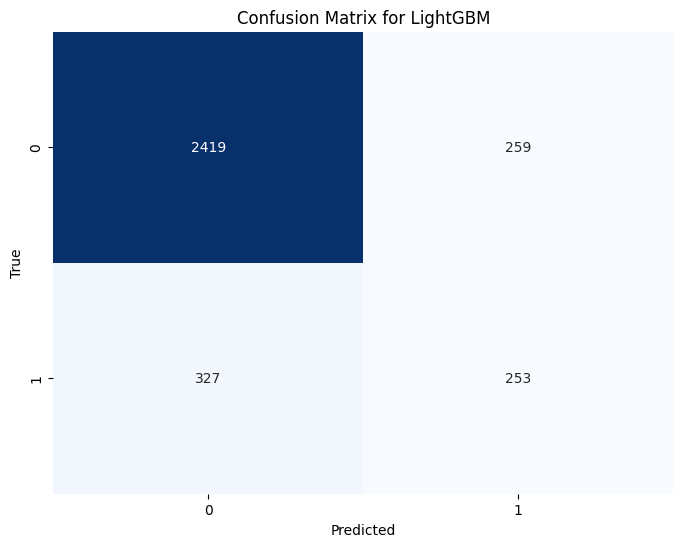

In [ ]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
for name, model in loaded_models.items():
    y_test_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_test_pred, name)
    print("\n")

In [ ]:
info = {'age': 40, 'income': 55000, 'living': 1, 'employment': 40, 'purpose': 2, 'amount': 15000, 'interest': 4, 'percentage': 10, 'status': 2, 'bank_years': 15}
age = info['age']
income = info['income']
living = info['living']
employment = info['employment']
purpose = info['purpose']
amount = info['amount']
interest = info['interest']
percentage = info['percentage']/100
status = info['status']
bank_years = info['bank_years']
customer_id = 123456
input_data = np.array([[age, income, living, employment, purpose, amount, interest, percentage, status, bank_years]])
input_data = scaler.transform(input_data)

In [ ]:
model_name = "Random Forest"
# Load the model and make predictions here
model = joblib.load(f"models/{model_name}.joblib")
print(f"Model {model_name} loaded from models/{model_name}.joblib")
print("Got information from the form, now predicting...")
prediction = model.predict(input_data)
if prediction[0] == 1:
    prediction = "You will default on your loan."
else:
    prediction = "You will not default on your loan."
print(f"Prediction made: {prediction}")